In [1]:
# Color Spaces
# Cropping
# Resize
# Rotation
# Brightness
# Contrast
# Image Thresholding
# Live Images

In [2]:
from skimage import io, exposure, color, transform
import cv2
import matplotlib.pyplot as plt

In [24]:
import numpy as np
from warnings import filterwarnings as fw
fw('ignore')
from skimage import viewer

In [63]:
from time import sleep

In [4]:
img = cv2.imread('ronaldo.jpg')

In [5]:
def imshow(im):
    cv2.imshow('image',im)
    cv2.waitKey(0)

In [6]:
def showimg(im):
    io.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

In [7]:
imshow(img)

In [8]:
img_a = cv2.convertScaleAbs(img, alpha=1, beta=80) # brightness (beta) 0-100, contrast (alpha) 1.0 to 3.0

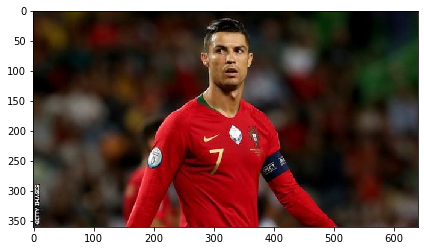

In [9]:
showimg(img)

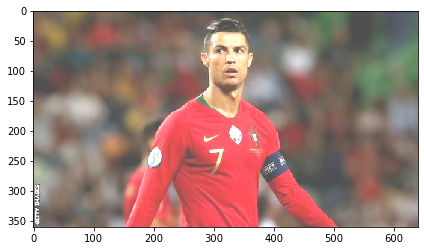

In [10]:
showimg(img_a)

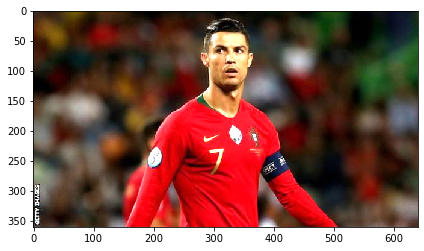

In [11]:
img_b = cv2.convertScaleAbs(img, alpha=1.5, beta=1)
showimg(img_b)

In [12]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
img_red_ = img[:,:,-1].copy()
img_green_ = img[:,:,-2].copy()
img_blue_ = img[:,:,-3].copy()

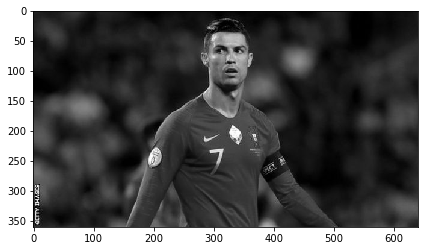

In [14]:
showimg(img_gray)

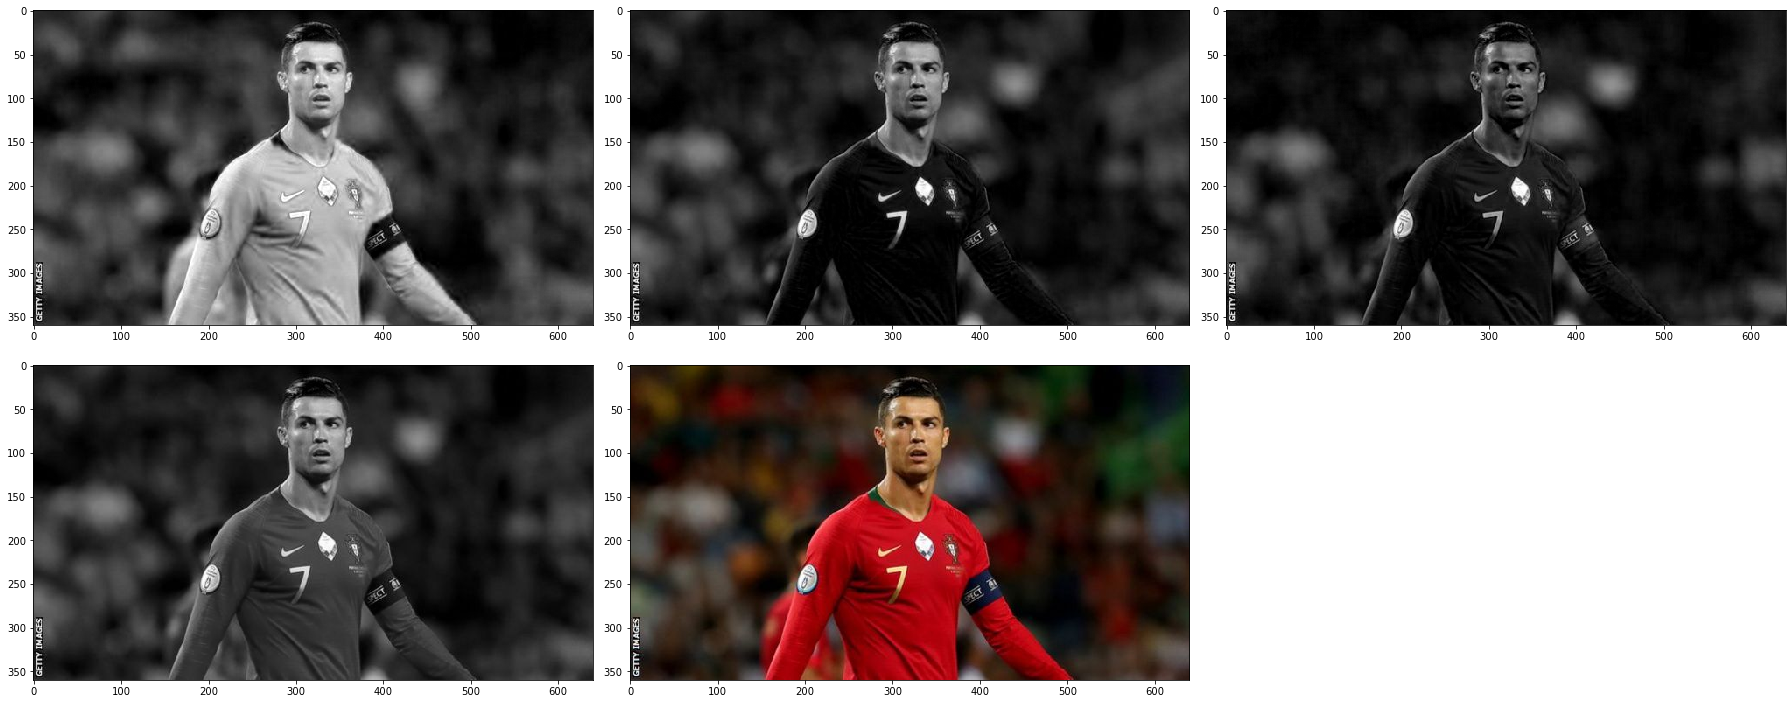

In [15]:
plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
showimg(img_red_)
plt.subplot(2,3,2)
showimg(img_green_)
plt.subplot(2,3,3)
showimg(img_blue_)
plt.subplot(2,3,4)
showimg(img_gray)
plt.subplot(2,3,5)
showimg(img)

In [16]:
img_red = cv2.subtract(img_red_, img_gray)

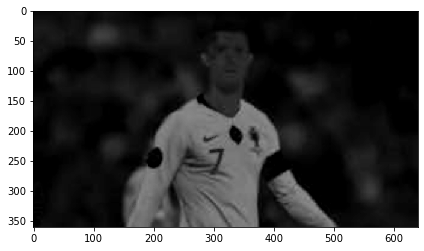

In [17]:
showimg(img_red)

In [25]:
def view_img(im, convert=True):
    if convert:
        v = viewer.ImageViewer(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
    else:
        v = viewer.ImageViewer(im)    
    v.show()

In [26]:
view_img(img_red)

In [29]:
r,img_thresh = cv2.threshold(img_red, 75, 255, cv2.THRESH_BINARY)

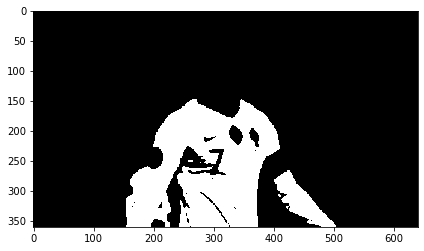

In [30]:
showimg(img_thresh)

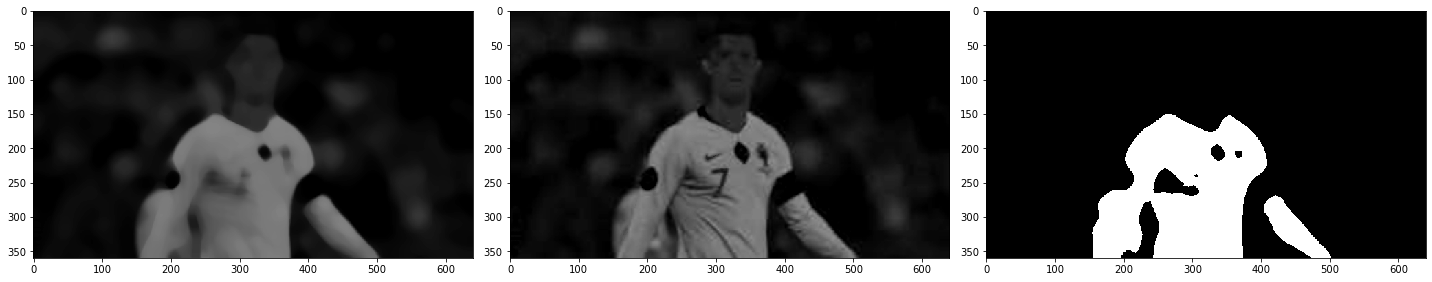

In [37]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
img_red_2 = cv2.medianBlur(img_red, 21)
showimg(img_red_2)
plt.subplot(1,3,2)
showimg(img_red)
r,img_thresh2 = cv2.threshold(img_red_2, 75, 255, cv2.THRESH_BINARY)

plt.subplot(1,3,3)
showimg(img_thresh2)

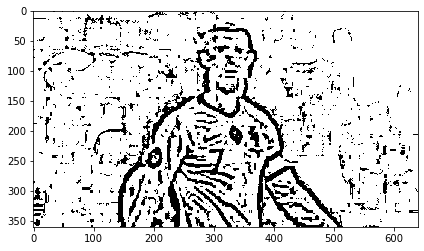

In [45]:
img_thresh3 = cv2.adaptiveThreshold(img_red, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 2)
showimg(img_thresh3)

In [46]:
img_thresh.shape

(360, 640)

In [47]:
img_thresh2.shape

(360, 640)

In [48]:
img.shape

(360, 640, 3)

In [51]:
view_img(img_thresh)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


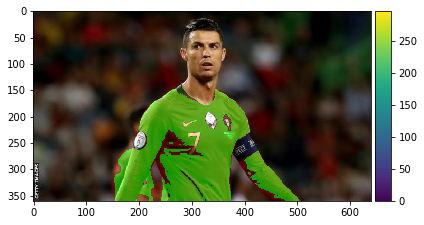

In [59]:
rows, columns, plane = img.shape
img_copy = img.copy().astype(np.uint16)
for r in range(rows):
    for c in range(columns):
        if img_thresh[r,c] == 255:
            img_copy[r,c,-1] = np.subtract(img_copy[r,c,-1],np.uint16(100)) #cv2.subtract(img_copy[r,c,-1],cv2.UMat(np.array(50,dtype=np.uint8)))
            img_copy[r,c,-2] = np.add(img_copy[r,c,-2],np.uint16(150))   #cv2.add(img_copy[r,c,-2],cv2.UMat(np.array(80,dtype=np.uint8)))
showimg(img_copy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


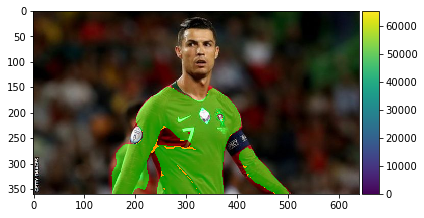

In [60]:
rows, columns, plane = img.shape
img_copy = img.copy().astype(np.uint16)
for r in range(rows):
    for c in range(columns):
        if img_thresh2[r,c] == 255:
            img_copy[r,c,-1] = np.subtract(img_copy[r,c,-1],np.uint16(100)) #cv2.subtract(img_copy[r,c,-1],cv2.UMat(np.array(50,dtype=np.uint8)))
            img_copy[r,c,-2] = np.add(img_copy[r,c,-2],np.uint16(150))   #cv2.add(img_copy[r,c,-2],cv2.UMat(np.array(80,dtype=np.uint8)))
showimg(img_copy)

In [61]:
cap = cv2.VideoCapture(0)
_, image = cap.read()
cap.release()

In [68]:
cap = cv2.VideoCapture(0)
for i in range(2000):
    r, image = cap.read()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if r:
        cv2.imshow('preview',image)
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
    sleep(0.1)
cap.release()
cv2.destroyAllWindows()